In [43]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

분석대상 기간 : 23.03.13 ~23.03.19 (1주일)
- 향후 6시간까지의 5분단위 예측 모델 
- 평가지표 MAPE(Mean Absolute Percentage Error)
- 제시한 예측 모델을 실행하여 과거 수요 데이터로 검증한 예측실적치와 MAPE를 분석 대상기간에 대해 제시

In [27]:
df = pd.read_csv('한국전력거래소_5분단위 전력수급현황_20220407.csv',encoding='cp949')

In [28]:
df

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2012-06-01 00:00,64355.0,51726.33,59400,12628.67,24.41439,12628.67,24.41439
1,2012-06-01 00:05,64355.0,51342.53,60800,13012.47,25.34442,13012.47,25.34442
2,2012-06-01 00:10,64355.0,51583.17,60800,12771.83,24.75969,12771.83,24.75969
3,2012-06-01 00:15,64355.0,51631.69,60800,12723.31,24.64245,12723.31,24.64245
4,2012-06-01 00:20,64355.0,51252.66,60800,13102.35,25.56423,13102.35,25.56423
...,...,...,...,...,...,...,...,...
1035062,2022-04-07 23:35,82791.9,63877.30,69300,18914.70,29.61100,10803.00,16.91210
1035063,2022-04-07 23:40,82768.1,63525.30,69300,19242.80,30.29160,10696.40,16.83800
1035064,2022-04-07 23:45,82767.9,63506.20,69300,19261.70,30.33040,10501.30,16.53580
1035065,2022-04-07 23:50,82762.4,62819.60,69300,19942.80,31.74610,10706.30,17.04290


In [23]:
df

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트),수요_1,수요_2,...,수요_63,수요_64,수요_65,수요_66,수요_67,수요_68,수요_69,수요_70,수요_71,수요_72
0,2012-06-01 00:00,64355.0,51726.33,59400,12628.67,24.41439,12628.67,24.41439,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-06-01 00:05,64355.0,51342.53,60800,13012.47,25.34442,13012.47,25.34442,51726.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-06-01 00:10,64355.0,51583.17,60800,12771.83,24.75969,12771.83,24.75969,51342.53,51726.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-06-01 00:15,64355.0,51631.69,60800,12723.31,24.64245,12723.31,24.64245,51583.17,51342.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-06-01 00:20,64355.0,51252.66,60800,13102.35,25.56423,13102.35,25.56423,51631.69,51583.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035062,2022-04-07 23:35,82791.9,63877.30,69300,18914.70,29.61100,10803.00,16.91210,64059.30,64406.00,...,68824.8,68353.3,68834.8,68527.5,68635.8,68140.9,68314.3,67987.5,67818.3,67528.9
1035063,2022-04-07 23:40,82768.1,63525.30,69300,19242.80,30.29160,10696.40,16.83800,63877.30,64059.30,...,69021.3,68824.8,68353.3,68834.8,68527.5,68635.8,68140.9,68314.3,67987.5,67818.3
1035064,2022-04-07 23:45,82767.9,63506.20,69300,19261.70,30.33040,10501.30,16.53580,63525.30,63877.30,...,69151.2,69021.3,68824.8,68353.3,68834.8,68527.5,68635.8,68140.9,68314.3,67987.5
1035065,2022-04-07 23:50,82762.4,62819.60,69300,19942.80,31.74610,10706.30,17.04290,63506.20,63525.30,...,69520.2,69151.2,69021.3,68824.8,68353.3,68834.8,68527.5,68635.8,68140.9,68314.3


In [24]:
for i in range(1,12*6+1):
 df[f'수요_{i}']=df['현재수요(MW)'].shift(i)

In [19]:
df

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트),수요_1,수요_2,...,수요_63,수요_64,수요_65,수요_66,수요_67,수요_68,수요_69,수요_70,수요_71,수요_72
0,2012-06-01 00:00,64355.0,51726.33,59400,12628.67,24.41439,12628.67,24.41439,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-06-01 00:05,64355.0,51342.53,60800,13012.47,25.34442,13012.47,25.34442,51726.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-06-01 00:10,64355.0,51583.17,60800,12771.83,24.75969,12771.83,24.75969,51342.53,51726.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-06-01 00:15,64355.0,51631.69,60800,12723.31,24.64245,12723.31,24.64245,51583.17,51342.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-06-01 00:20,64355.0,51252.66,60800,13102.35,25.56423,13102.35,25.56423,51631.69,51583.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035062,2022-04-07 23:35,82791.9,63877.30,69300,18914.70,29.61100,10803.00,16.91210,64059.30,64406.00,...,68824.8,68353.3,68834.8,68527.5,68635.8,68140.9,68314.3,67987.5,67818.3,67528.9
1035063,2022-04-07 23:40,82768.1,63525.30,69300,19242.80,30.29160,10696.40,16.83800,63877.30,64059.30,...,69021.3,68824.8,68353.3,68834.8,68527.5,68635.8,68140.9,68314.3,67987.5,67818.3
1035064,2022-04-07 23:45,82767.9,63506.20,69300,19261.70,30.33040,10501.30,16.53580,63525.30,63877.30,...,69151.2,69021.3,68824.8,68353.3,68834.8,68527.5,68635.8,68140.9,68314.3,67987.5
1035065,2022-04-07 23:50,82762.4,62819.60,69300,19942.80,31.74610,10706.30,17.04290,63506.20,63525.30,...,69520.2,69151.2,69021.3,68824.8,68353.3,68834.8,68527.5,68635.8,68140.9,68314.3


In [33]:
# 3월 예측기간 데이터 분석
df['기준일시'] = pd.to_datetime(df['기준일시'])
df['year']= df['기준일시'].dt.year
df['month']= df['기준일시'].dt.month
df['day']= df['기준일시'].dt.day

In [63]:
month_3=df[df['month']==3]
month_3_and_2022 = month_3[(month_3['year']==2022) & (month_3['day']==13)]
month_3_and_2021 = month_3[(month_3['year']==2021) & (month_3['day']==13)]
month_3_and_2020 = month_3[(month_3['year']==2020) & (month_3['day']==13)]
# month_3_and_13_19=month_3[(month_3['day']>=13) & (month_3['day']<=19)]

In [48]:
month_3_one_day_13 = month_3[month_3['day']==13]

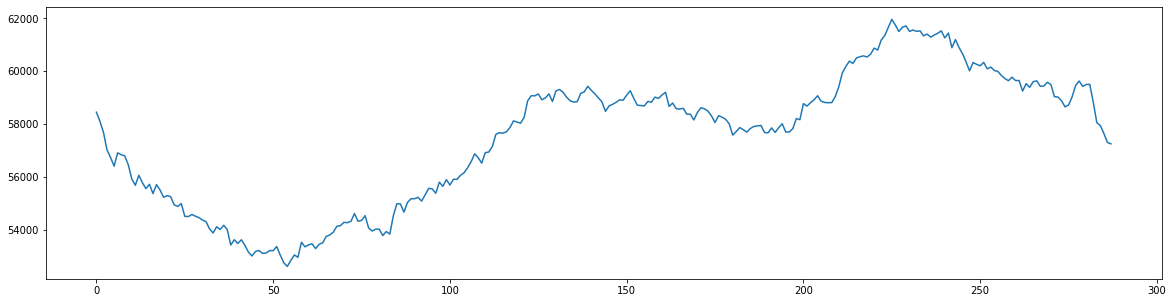

In [59]:
plt.figure(figsize=(20,5))
plt.plot(range(len(month_3_and_2022['기준일시'])), month_3_and_2022['현재수요(MW)'])
plt.show()

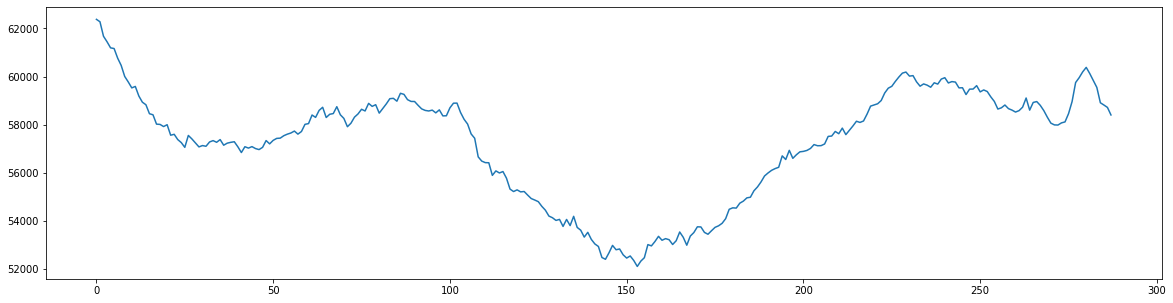

In [61]:
plt.figure(figsize=(20,5))
plt.plot(range(len(month_3_and_2021['기준일시'])), month_3_and_2021['현재수요(MW)'])
plt.show()

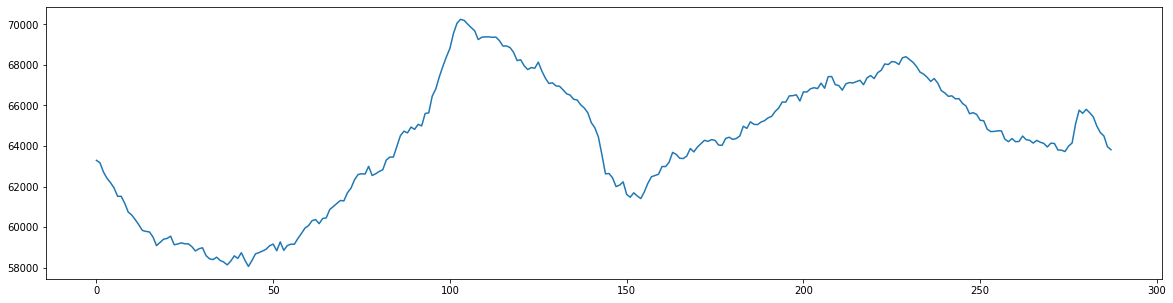

In [64]:
plt.figure(figsize=(20,5))
plt.plot(range(len(month_3_and_2020['기준일시'])), month_3_and_2020['현재수요(MW)'])
plt.show()

In [62]:
month_3_and_2021

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트),year,month,day
922850,2021-03-13 00:00:00,85962.5,62378.7,74000,23583.8,37.8074,8343.29,13.3752,2021,3,13
922851,2021-03-13 00:05:00,85578.2,62278.9,74000,23299.2,37.4111,8201.38,13.1688,2021,3,13
922852,2021-03-13 00:10:00,85591.2,61675.1,74000,23916.1,38.7776,8140.08,13.1983,2021,3,13
922853,2021-03-13 00:15:00,85591.7,61446.1,74000,24145.6,39.2957,9091.04,14.7952,2021,3,13
922854,2021-03-13 00:20:00,85573.3,61192.4,74000,24380.9,39.8431,9103.91,14.8775,2021,3,13
...,...,...,...,...,...,...,...,...,...,...,...
923133,2021-03-13 23:35:00,83647.0,59545.9,61500,24101.1,40.4748,9074.86,15.2401,2021,3,13
923134,2021-03-13 23:40:00,83643.5,58907.0,61500,24736.5,41.9924,9373.29,15.9120,2021,3,13
923135,2021-03-13 23:45:00,83639.2,58813.0,61500,24826.3,42.2122,9265.99,15.7550,2021,3,13
923136,2021-03-13 23:50:00,83623.7,58713.5,61500,24910.2,42.4266,9170.21,15.6186,2021,3,13


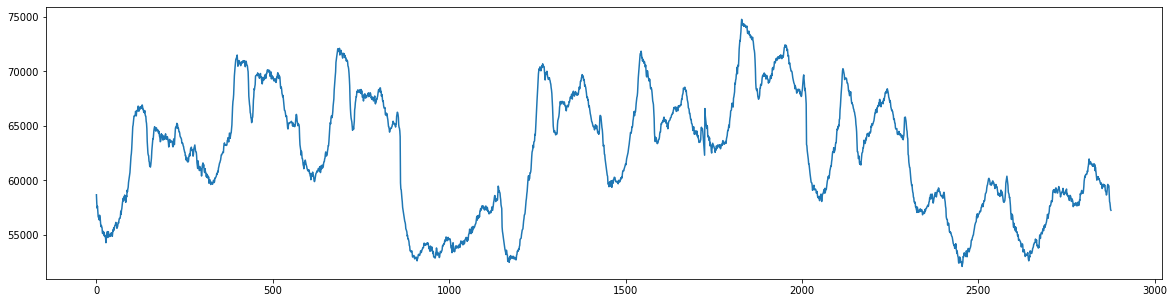

In [49]:
plt.figure(figsize=(20,5))
plt.plot(range(len(month_3_one_day_13['기준일시'])), month_3_one_day_13['현재수요(MW)'])
plt.show()

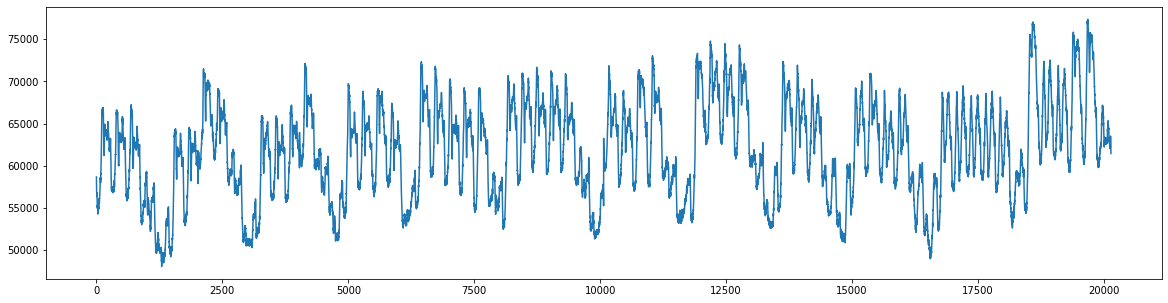

In [47]:
plt.figure(figsize=(20,5))
plt.plot(range(len(month_3_and_13_19['기준일시'])), month_3_and_13_19['현재수요(MW)'])
plt.show()

# 시간대별 예측?
# 시계열 예측?

In [20]:
ls

OBS_ASOS_TIM_20230609111526.csv
eda.ipynb
시간대별 기상 전국 2023.03.csv
일단위 23~22 기상데이터 전체.csv
한국전력거래소_5분단위 전력수급현황_20220407.csv


In [14]:
pd.read_csv('일단위 23~22 기상데이터 전체.csv',encoding='cp949')

/var/folders/b5/cvgq9g397b72nflqbqd_bpn00000gn/T/ipykernel_33772/1380335069.py:1: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('일단위 23~22 기상데이터 전체.csv',encoding='cp949')


,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,90,속초,2022-05-11,15.2,10.7,20.0,19.7,1256.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2022-05-12,14.0,11.1,2259.0,18.1,816.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2022-05-13,12.1,7.8,2358.0,15.3,1104.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2022-05-14,16.0,6.8,41.0,22.8,1426.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,속초,2022-05-15,15.4,9.6,357.0,19.7,1055.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37461,295,남해,2023-06-04,23.1,16.4,501.0,28.2,1453.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37462,295,남해,2023-06-05,22.3,18.4,552.0,26.6,1442.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37463,295,남해,2023-06-06,20.5,17.4,2302.0,25.1,1455.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37464,295,남해,2023-06-07,21.7,16.5,425.0,28.3,1518.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pd.read_csv('시간대별 기상 전국 2023.03.csv',encoding='cp949')

/var/folders/b5/cvgq9g397b72nflqbqd_bpn00000gn/T/ipykernel_33772/929706098.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('시간대별 기상 전국 2023.03.csv',encoding='cp949')


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,90,속초,2023-03-01 01:00,6.3,NaN,NaN,NaN,2.5,NaN,340.0,...,48.0,3487.0,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN
1,90,속초,2023-03-01 02:00,6.6,NaN,NaN,NaN,2.1,NaN,270.0,...,43.0,4854.0,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN
2,90,속초,2023-03-01 03:00,7.0,NaN,NaN,NaN,2.4,NaN,250.0,...,41.0,4830.0,NaN,NaN,2.9,NaN,NaN,NaN,NaN,NaN
3,90,속초,2023-03-01 04:00,7.3,NaN,NaN,NaN,3.3,NaN,200.0,...,36.0,3917.0,NaN,NaN,3.2,NaN,NaN,NaN,NaN,NaN
4,90,속초,2023-03-01 05:00,6.3,NaN,NaN,NaN,1.1,NaN,270.0,...,34.0,3955.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68395,295,남해,2023-03-30 20:00,14.2,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,1960.0,NaN,NaN,12.6,NaN,NaN,NaN,NaN,NaN
68396,295,남해,2023-03-30 21:00,13.9,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,1966.0,NaN,NaN,11.8,NaN,NaN,NaN,NaN,NaN
68397,295,남해,2023-03-30 22:00,13.3,NaN,NaN,NaN,0.4,NaN,0.0,...,NaN,2000.0,NaN,NaN,10.8,NaN,NaN,NaN,NaN,NaN
68398,295,남해,2023-03-30 23:00,13.0,NaN,NaN,NaN,0.7,NaN,250.0,...,NaN,1237.0,NaN,NaN,10.8,NaN,NaN,NaN,NaN,NaN
